# พลอตข้อมูลรีโมทเซนซิ่่งด้วย matplotlib

โค้ดเอามาจาก http://patrickgray.me/open-geo-tutorial/chapter_3_visualization.html

* การใช้ matplotlib มีประโยชน์อย่างมากต่อการวิเคราะห์ข้อมูลรีโมทเซนซิ่ง เนื่องจากสามารถพลอตแผนที่และกราฟข้อมูลจุดภาพได้ 
* แต่ผู้ใช้ matplotlib มักจะมีความสับสนในการใช้งานตอนแรก เนื่องจากมีวิธีการพลอตสองแลบใหญ่ ตามลิงก์นี้ http://jakevdp.github.io/mpl_tutorial/index.html
    * 1. Pyplot state-machine อันนี้อย่างง่าย http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut1.html
    * 2. Object-oriented อันนี้แบบวัตถุ ซับซ้อนหน่อย แต่มีประสิทธิภาพสูง แนะนำให้ทำแบบนี้  http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut2.html

## การแสดงผลภาพ Image display

In [1]:
import numpy as np
import rasterio     
from rasterio.plot import show, show_hist # ฟังก์ชันใน rasterio ที่จะใช้พลอต

import matplotlib   
import matplotlib.pyplot as plt

import cv2
from skimage import exposure

### แปลงภาพจาก 12 bit เป็น 8bit

In [2]:
from osgeo import gdal

scale = '-scale 0 4095 0 255'
options_list = [
    '-ot Int16',
    '-of GTiff',
    scale
] 
options_string = " ".join(options_list)

src='./1data/phl_s2_clip_nu.tif'
dsc= './2outp/phl_s2_clip_nu_8bit.tif'

gdal.Translate(dsc, src,  options=options_string)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001B37DC9AA90> >

In [3]:
# ชื่อไฟล์
img_fp = './2outp/phl_s2_clip_nu_8bit.tif'

# เปิดไฟล์
dataset = rasterio.open(img_fp)

In [4]:
# อ่านข้อมูลเข้ามาด้วยการใช้ read()
full_img = dataset.read()
#full_img.shape # bands, rows, cols

#เปลี่ยนข้อมูลที่นำเข้ามาให้อยู่ในรูป numpy array
images= np.array(full_img, dtype=full_img[0].dtype)

# ตรวจสอบ shape ของราสเตอร์อาเรย์
images.shape

(13, 474, 696)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


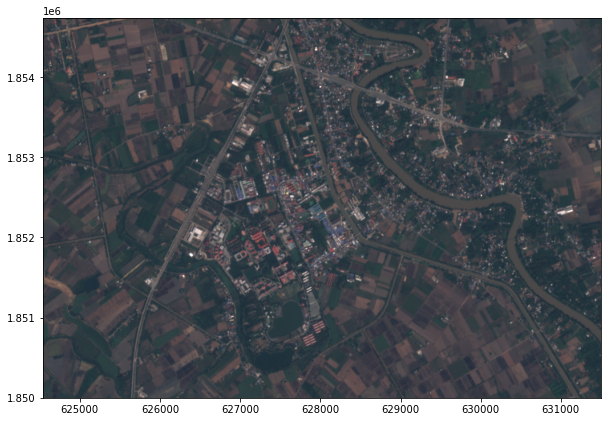

<AxesSubplot:>

In [5]:
fig, ax = plt.subplots(figsize=(10,7))

#พลอตภาพ
show(images[[3,2,1], :, :], transform=dataset.transform)

Text(0.5, 1.0, 'Histogram')

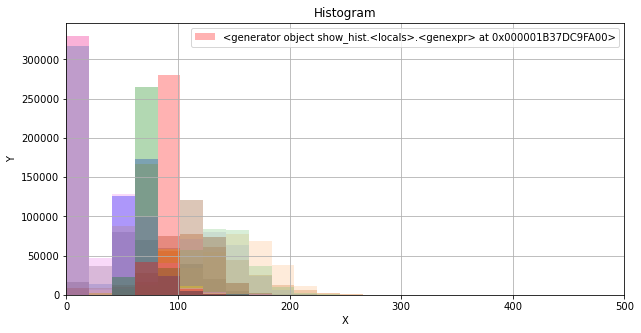

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
show_hist(images, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=ax)
ax.set_xlim(0,500)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Histogram')

### ตรวจสอบข้อมูลในภาพ

In [7]:
# ภาพมีกี่แบนด์
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# จำนวนแถวและหลักของข้อมูลภาพ
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# ไดร์ฟเวอร์ที่ใช้ในการเปิดข้อมูลราสเตอร์นี้
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# เส้นโครงแผนที่อะไรWhat is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj)

Number of bands in image: 13

Image size is: 474 rows x 696 columns

Raster driver: GTiff

Image projection:
EPSG:32647


In [8]:
# สามารถดึงแบนด์อื่นออกมาได้ เช่นแบนด์ red ที่เป็นแบนด์ที่ 3
red_band = images[2, :, :] #
print(red_band.shape)

(474, 696)


In [9]:
# โค้ดด้านล่างได้ผลเช่นเดียวกันกับด้านบน
red_band_read = dataset.read(3) #
print(red_band_read.shape)

if np.array_equal(red_band_read, red_band): # are they equal?
    print('They are the same.')

(474, 696)
They are the same.


### การพลอต 1D อย่างง่าย
ใช้ matplotlib

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

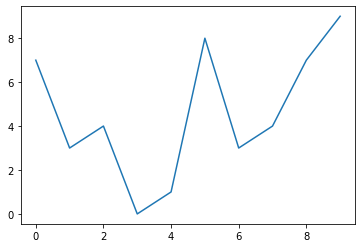

In [11]:
# อาเรย์ที่มีค่า 0 - 9
x = np.arange(10)
# อาเรย์ที่มีเลขสุ่ม 10 จำนวนระหว่าง 0-10
y = np.random.randint(0, 10, size=10)

# พลอตค่า x  และ y แบบเส้น
plt.plot(x, y)

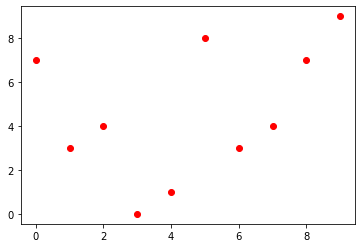

In [12]:
# พลอตแบบจุดสีแดง ro โดย ls ว่างเปล่าคือไม่มี "linestyle") 
plt.plot(x, y, 'ro', ls='')

#### เปรียบการพลอตสองแบบคือ 1.Pyplot state-machine  กับ 2.Object-oriented

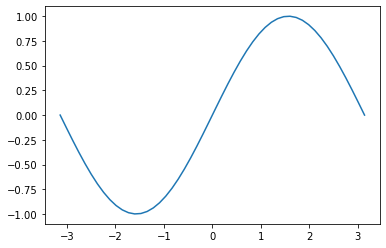

In [13]:
# เตรียมจุด x,y 50 จุด
x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)

# วิธีแรก พลอตด้วยการใช้ matplotlib's functional API:
# พิมพ์บรรทัดเดียว ง่ายแต่ไม่ยืดหยุ่น ไม่สามารถปรับแก้อะไรเพิ่มเติมไปได้มาก
plt.plot(x, y)

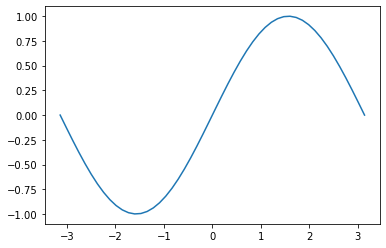

In [14]:
# วิธีที่สอง พลอตด้วยการใช้ matplotlib's object-oriented API:
# จะทำการสร้าง figure และ axis object ก่อน ด้วยการใช้  `fig` และ`ax`
fig, ax = plt.subplots()

# แล้วจะใช้วัตถุทั้งสอง fig, ax เพื่อจัดการองค์ประกอบในการพลอตของเรา
ax.plot(x, y)

### การพลอตข้อมูลแบบ 2D
* สิ่งที่มักจะทำการวิเคราะห์กันบ่อยๆ ในทางรีโมทเซนซิ่งเบื้องต้นเลย ก็คือการพลอตค่าจุดภาพในแต่ละคู่แบนด์ที่ 
* ต้องทำการแปลงข้อมูล flatten จาก 2D ไปเป็น 1D ก่อนที่จะสามารถพลอต scatter plot ได้

In [15]:
# ปรินท์ shape ก่อนทำการแปลงไปเป็น 1D
red = images[3, :, :]
nir = images[7, :, :]
print('Array shape before: {shp} (size is {sz})'.format(shp=red.shape, sz=red.size))

# แปลงจาก 2D ไปเป็น 1D
red_flat = np.ndarray.flatten(red)
nir_flat = np.ndarray.flatten(nir)

print('Array shape after: {shp} (size is {sz})'.format(shp=red_flat.shape, sz=red_flat.size))

Array shape before: (474, 696) (size is 329904)
Array shape after: (329904,) (size is 329904)


ต่อไปก็สามารถจะพลอตข้อมูล scatter plot ได้แล้ว

Text(0.5, 1.0, 'Tasseled Cap, eh?')

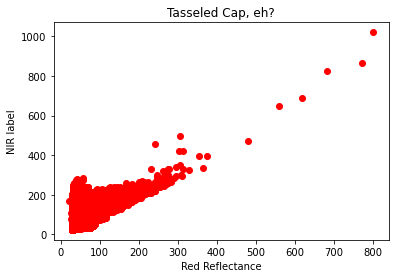

In [16]:
fig, ax = plt.subplots()

# สร้างพลอต
ax.scatter(red_flat, nir_flat, color='r', marker='o')

# เพิ่มป้ายชื่อแกน
ax.set_xlabel('Red Reflectance')
ax.set_ylabel('NIR label')

# เพิ่มชื่อกราฟ
ax.set_title('Tasseled Cap, eh?')

กราฟที่ได้ แกน x และ y มีค่าสูงสุดต่ำสุดไม่เท่ากัน เราควรจะกำหนดค่าให้เท่ากัน

Text(0.5, 1.0, 'Tasseled Cap, eh?')

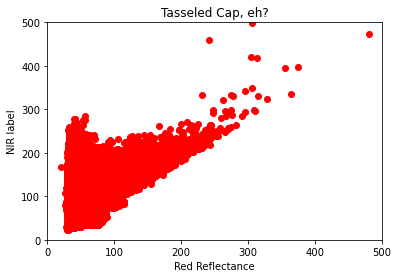

In [17]:
fig, ax = plt.subplots()

# สร้างพลอต
ax.scatter(red_flat, nir_flat, color='r', marker='o')

# คำนวณค่าสูงสุดต่ำสุด
plot_min = min(red.min(), nir.min())
plot_max = max(red.max(), nir.max())

#ax.set_xlim((plot_min, plot_max))
#ax.set_ylim((plot_min, plot_max))

ax.set_xlim((0, 500))
ax.set_ylim((0, 500))

# เพิ่มป้ายชื่อแกน
ax.set_xlabel('Red Reflectance')
ax.set_ylabel('NIR label')

# เพิ่มชื่อกราฟ
ax.set_title('Tasseled Cap, eh?')

### พลอตค่าเฉลี่ยในแต่ละแบนด์

Text(0.5, 1.0, 'Band Intensities')

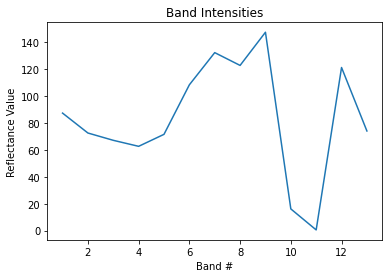

In [18]:
# สร้างเลขจำนวนแบนด์ 1-13 ในแนวแกน x
x = np.arange(1,14)
# คำนวณค่าเฉลี่ยของแต่ละแบนด์
y = np.mean(images, axis=(1,2))

fig, ax = plt.subplots()
# พลอตในแบบเส้น
ax.plot(x, y)

# เพิ่มป้ายชื่อแกน
ax.set_xlabel('Band #')
ax.set_ylabel('Reflectance Value')
# เพิ่มชื่อกราฟ
ax.set_title('Band Intensities')

แบนด์ที่ 8 กับ 9 คือ nir กับ red edge มีค่าการสะท้อนที่สูง เนื่องจากเป็นแบนด์ที่เกี่ยวกับการสะท้อนค่าของพืชพรรณ

### พลอตภาพแบบข้อมูล 2D
ข้อมูลที่นำมาพลอตแบบจุดในรูปแบบ 1D ของ scatter plot ทำให้เข้าใจได้ถึงค่าจุดภาพ แต่ไม่เข้าใจเชิงพื้นที่ ดังนั้นการพลอตภาพ จะช่วยให้การวิเคราะห์มีประสิทธิภาพมากขึ้น

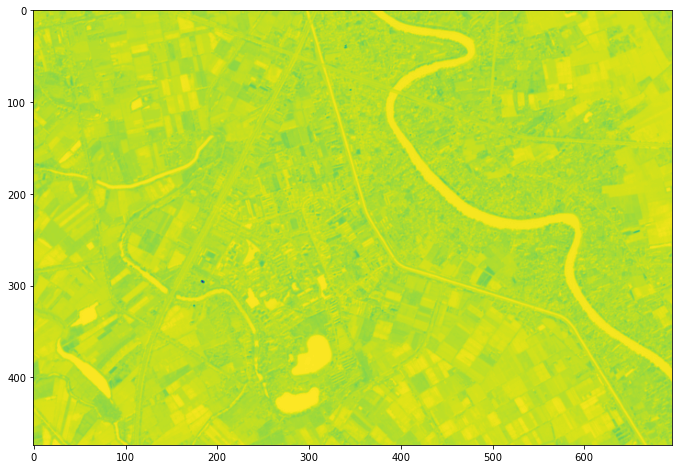

In [19]:
#ใช้ matplotlib.pyplot ฟังก์ชัน "imshow" เพื่อแสดงภาพ nir 
# สามารถดูค่า cmap อื่นๆ ได้ https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(images[7, :, :], cmap='viridis_r') # _r คือการกลับค่า cmap 

* ภาพาน้ำน่าน คลองชลประทาน สระน้ำในม.นเรศวร เห็นเด่นชัดใน nir คือ มีสี เหลือง
* ควรเพิ่ม colorbar เพื่อที่จะได้เห็นว่าสีที่แสดงหมายความว่าอย่างไร

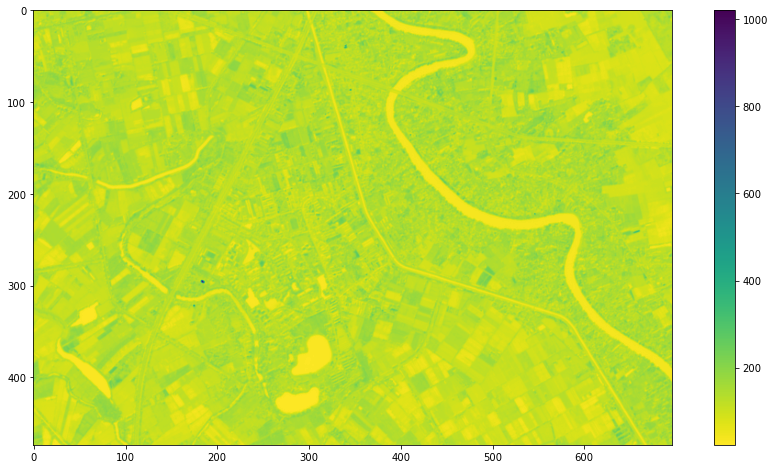

In [20]:
fig, ax = plt.subplots(figsize=(15, 8)) #15 คือ แถว หรือy ส่วน 8 คือ หลักหรือ x
img = ax.imshow(images[7, :, :], cmap='viridis_r') # _r คือการกลับค่า cmap 
fig.colorbar(img, ax=ax) # เพิ่ม color bar

### การใช้งาน subplot ในการพลอตข้อมูลภาพ

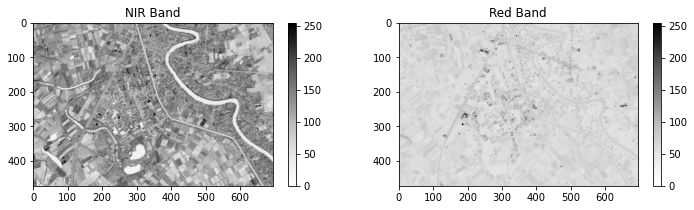

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3)) # 1, 2  คือ มี 1 แถว 2 คอลัมน์  
# เราสามารถใช้อินเด็กซ์ ax ในการพลอตภาพเราได้
# fig, ax = plt.subplots(1, 2)
# ax1 = ax[0]

#หาค่าการสะท้อนสูงสุด เพื่อนำไปใส่ในค่าสเกล colorbar
#max_ref = np.amax([np.amax(images[7:,:]), np.amax(images[2:,:])]) # ทำให้ภาพขาด contrast

max_ref = 255

# พลอต nir ในภาพแรก
nir = ax1.imshow(images[7, :, :], cmap=plt.cm.Greys)
ax1.set_title("NIR Band")
nir.set_clim(vmin=0, vmax=max_ref)

fig.colorbar(nir, ax=ax1)

# พลอต red ในภาพที่สอง
red = ax2.imshow(images[2, :, :], cmap=plt.cm.Greys)
ax2.set_title("Red Band")
red.set_clim(vmin=0, vmax=max_ref)
fig.colorbar(red, ax=ax2)


### พลอตภาพ 3D arrays หรือแบบ multispectral images
* การพลอตภาพแบบสีผสมหรือ color composite ดีกว่าแบบการใช้ภาพแค่แบนด์เดียว เนื่องจากจะทำให้เห็นรายละเอียดของพื้นที่ จากความแตกต่างที่แสดงออกมาในแต่ละช่วงคลื่นที่ใช้
* ในการพลอตใน matplotlib ต้องแปลงข้อมูลให้อยู่ในสเกล 0 ถึง 1 นั่นคือ ต้องมีการ normalizing ข้อมูล

In [22]:
from rasterio.plot import reshape_as_raster, reshape_as_image

# ใช้แบนด์  SWIR2, NIR, and Red bands
index = np.array([11, 7, 3])
colors = images[index, :, :].astype(np.float64)

max_val = 255
min_val = 0

# แปลงค่าให้อยู่ในช่วง 0 ถึง 1 
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[0]):
    colors[b, :, :] = colors[b, :, :] * 1 / (max_val - min_val)

# ข้อมูลราสเตอร์จะอยู่ในรูปแบบ [bands, rows, cols] ส่วนข้อมูลภาพมักอยู่ในรูปแบบ [rows, cols, bands]
# ดังนั้นจึงจำเป็นต้องทำการ reshaped อาเรย์ของเรา
print(colors.shape)
colors_reshaped = reshape_as_image(colors)
print(colors_reshaped.shape)

(3, 474, 696)
(474, 696, 3)


ตอนนี้เราได้ผลลัพธ์จากการ reshape และการแปลงค่าจุดภาพแล้ว ต่อไปจะทำการคำนวณค่า NDVI เพื่อเปรียบเทียบกับภาพสีผสม

In [23]:
# คำนวณค่า NDVI จากแบนด์ NIR และ RED ของเซนติเนล 2
np.seterr(divide='ignore', invalid='ignore')
bandNIR = images[7, :, :]
bandRed = images[3, :, :]

ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

Text(0.5, 1.0, 'NDVI')

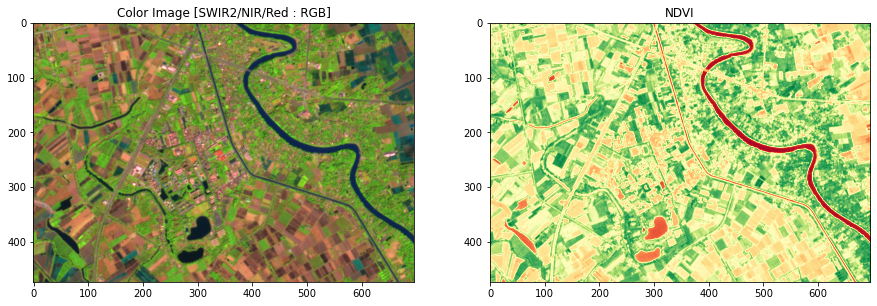

In [24]:
# พลอตภาพผลลัพธ์
fig, axs = plt.subplots(1, 2, figsize=(15,6)) 

# Show the color image
axs[0].imshow(colors_reshaped)
axs[0].set_title('Color Image [SWIR2/NIR/Red : RGB]')

# Show NDVI
axs[1].imshow(ndvi, cmap='RdYlGn')
axs[1].set_title('NDVI')

* สามารถเห็นพื้นดินเปิดโล่งจากภาพแรก ในแปลงเกษตร เนื่องจากใช้ swir ที่เด่นในเรื่องดิน ในขณะที่ภาพที่สอง แสดงความสอดคล้องของ ndvi ที่มีค่าที่ต่ำในแปลงเกษตรที่ส่วนใหญ่เป็นพื้นที่นาข้าว
* แม่น้ำน่าน คลองชลประทาน และแหล่งกักเก็บน้ำในม.นเรศวร มีค่า NDVI ที่ต่ำ และมีการดูดกลืนพลังงานค่าคลื่นแม่เหล็กไฟฟ้าที่สูง ทำให้จึงเห็นเป็นสีดำในภาพซ้าย และเป็นสีแดงในภาพขวา
* พื้นที่ที่อยู่ใกล้แม่น้ำน่าน พบว่ามีค่า NDVI ที่สูง เนื่องจากมีการทำสวนผักและพืชพรรณ ในขณะที่พื้นที่ที่อยู่ห่างออกไปจากแม่น้ำน่านและคลองส่งน้ำชลประทาน จะพบว่ามีค่า NDVI ที่ต่ำ อย่างไรก็ตามพื้นที่ตัวอย่างนี้เป็นภาพในช่วงฤดูแล้งที่ปลอดเมฆ แล้วเป็นพื้นที่ที่น้ำชลประทานเข้าถึงได้ 

### พลอตแบบง่ายกว่าด้านบน ด้วยการใช้ฟังก์ชัน show ที่มีมากับ matplotlib

In [25]:
# ฟังก์ชัน show สร้างมาจาก matplotlib  โดยนำมาใช้ใน rasterio
from rasterio.plot import show

<AxesSubplot:>

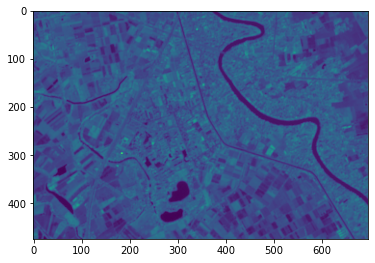

In [26]:
fig, ax = plt.subplots(figsize=(6,6))

# แสดงภาพอินฟราเรดใกล้ (NIR)
show((dataset.read(7)), ax=ax)

### ต้องมาดูว่าแบนด์เป็นอย่างไร ค่า DN ทำไมถึงพลอตสีจริงไม่ได้

Text(0.5, 1.0, 'RGB in matplotlib imshow')

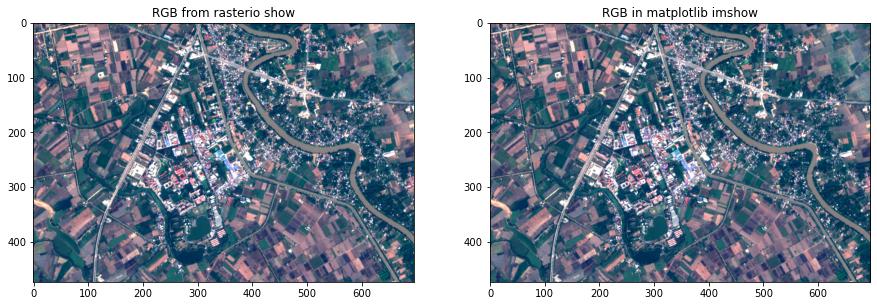

In [27]:
from rasterio.plot import adjust_band

rgb =images[[3,2,1]] # read in red, green, blue

# Contrast stretching
p2, p98 = np.percentile(rgb, (2, 98))
rgb = exposure.rescale_intensity(rgb, in_range=(p2, p98))

#  ยืดฮิสโตแกรมแบบ Adaptive Equalization
#rgb = exposure.equalize_adapthist(rgb, clip_limit=0.03)

rgb_norm = adjust_band(rgb) # normalize bands to range between 1.0 to 0.0
rgb_reshaped = reshape_as_image(rgb_norm) # reshape to [rows, cols, bands]


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# the rasterio show function takes in [bands, rows, cols] so we don't need to reshape
show(rgb_norm, ax=axs[0])
axs[0].set_title("RGB from rasterio show")

# plot with normal matplotlib functions
axs[1].imshow(rgb_reshaped)
axs[1].set_title("RGB in matplotlib imshow")

In [28]:
rgb_reshaped.shape

(474, 696, 3)

## displaying all three bands side by side

<AxesSubplot:title={'center':'blue channel'}>

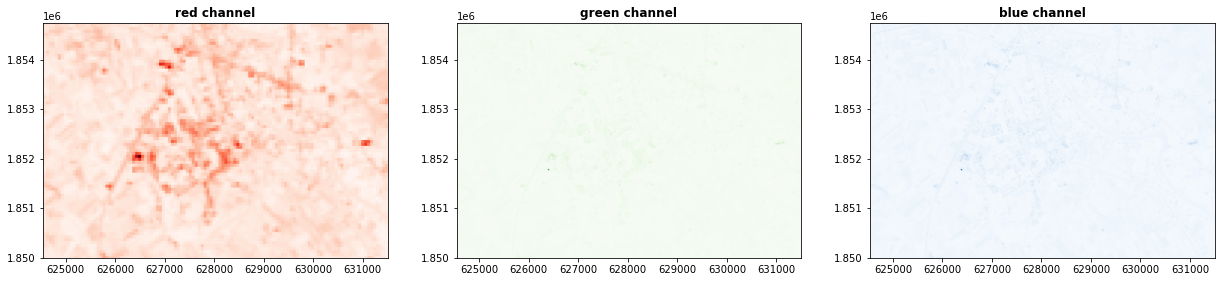

In [29]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
show((dataset, 1), ax=axr, cmap='Reds', title='red channel')
show((dataset, 2), ax=axg, cmap='Greens', title='green channel')
show((dataset, 3), ax=axb, cmap='Blues', title='blue channel')

### พลอตค่าฮิสโตแกรมโดยใช้ rasterio 


(0.0, 255.0)

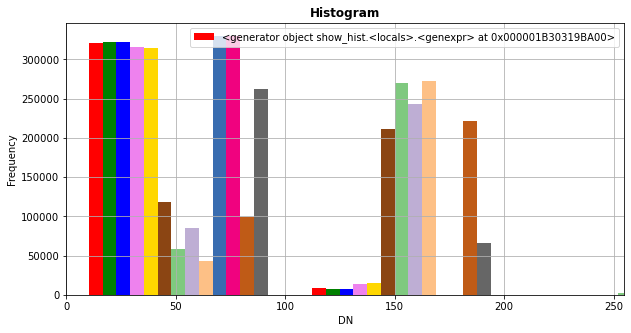

In [30]:
from rasterio.plot import show_hist

fig, ax = plt.subplots(figsize=(10,5))
show_hist(dataset, ax=ax)
plt.xlim([0, 255])

### ตรวจสอบการซ้อนทับกันของค่าการสะท้อนในแต่ละแบนด์

(0.0, 255.0)

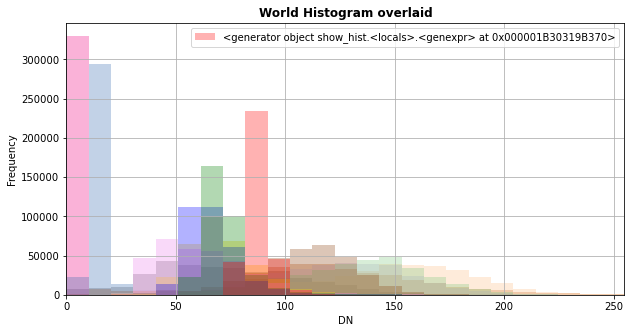

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
show_hist(dataset, ax=ax, bins=100, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram overlaid")
plt.xlim([0, 255])